<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm 
from datetime import datetime


%matplotlib inline
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [2]:
df = pd.read_csv("..........assets_prices.csv")
df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [3]:
dfcopy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [5]:
for column in dfcopy.columns:
    dfcopy[column] = dfcopy[column].interpolate(method='linear', limit_direction='forward', axis=0)

In [6]:
dfcopy
for column in dfcopy.columns[1:]:  # Ignora la columna 'date'
    dfcopy[column] = dfcopy[column] / dfcopy[column].iloc[0] #Normalizamos

In [7]:
dfcopy['date'] = pd.to_datetime(dfcopy['date'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


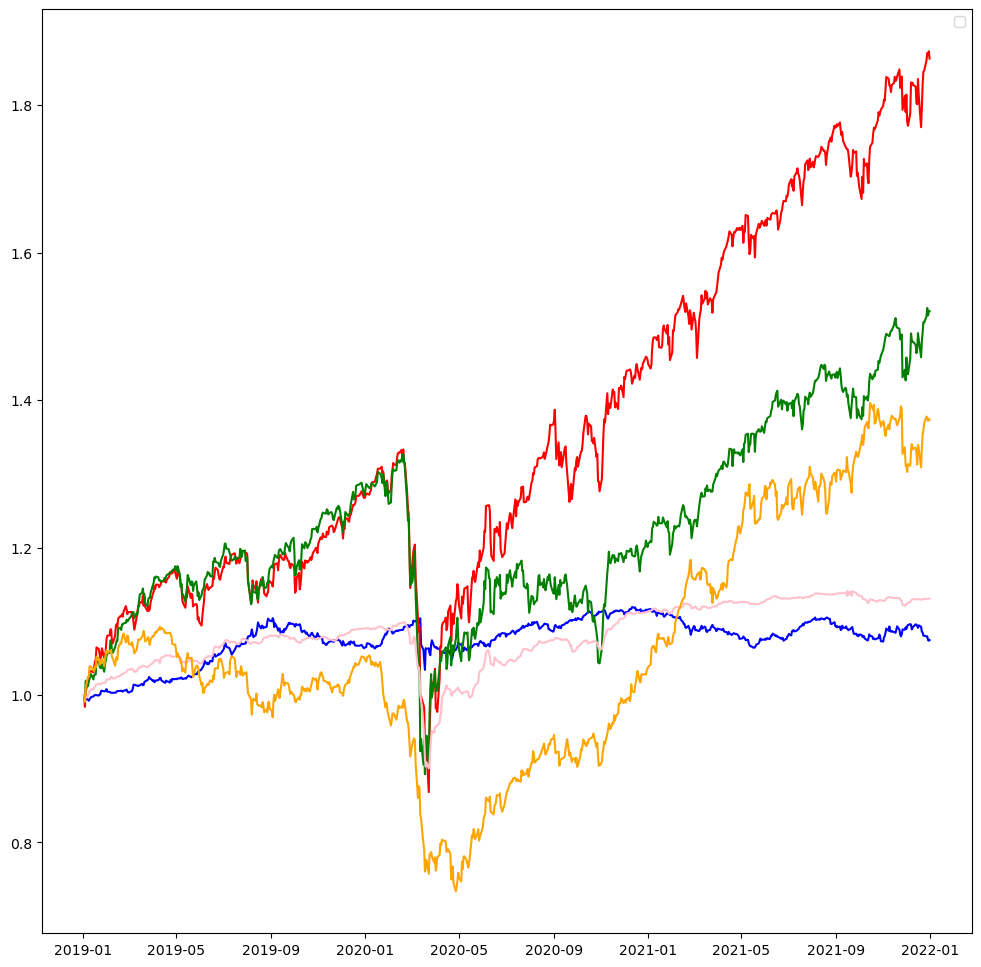

In [8]:
time = dfcopy["date"]
Asset1 = dfcopy["Asset1"]
Asset2 = dfcopy["Asset2"]
Asset3 = dfcopy["Asset3"]
Asset4 = dfcopy["Asset4"]
Asset5 = dfcopy["Asset5"]
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(time, Asset1, color="blue")
ax.plot(time, Asset2, color="red")
ax.plot(time, Asset3, color="green")
ax.plot(time, Asset4, color="pink")
ax.plot(time, Asset5, color="orange")
ax.legend();

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [9]:
dfrendimientos = {}
for columna in dfcopy.columns[1:]:
    dfrendimientos[columna + '_rendimientos'] = dfcopy[columna].pct_change() * 100


In [10]:
dfrendimientos = pd.DataFrame(dfrendimientos)
dfrendimientos

,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
0,NaN,NaN,NaN,NaN,NaN
1,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
778,-0.091306,0.738415,0.543901,0.005841,0.667672
779,0.006442,0.548309,0.759918,0.005841,-0.114106
780,-0.486243,-0.158812,-0.664707,0.005840,-0.314151
781,-0.069556,0.290341,0.334577,0.026280,0.143246


In [11]:
dfrendimientos["date"] = dfcopy["date"]

In [12]:
dfrendimientos.set_index("date", inplace=True)

<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [13]:
num = dfcopy.select_dtypes("number")

In [14]:
num_corr = num.corr()

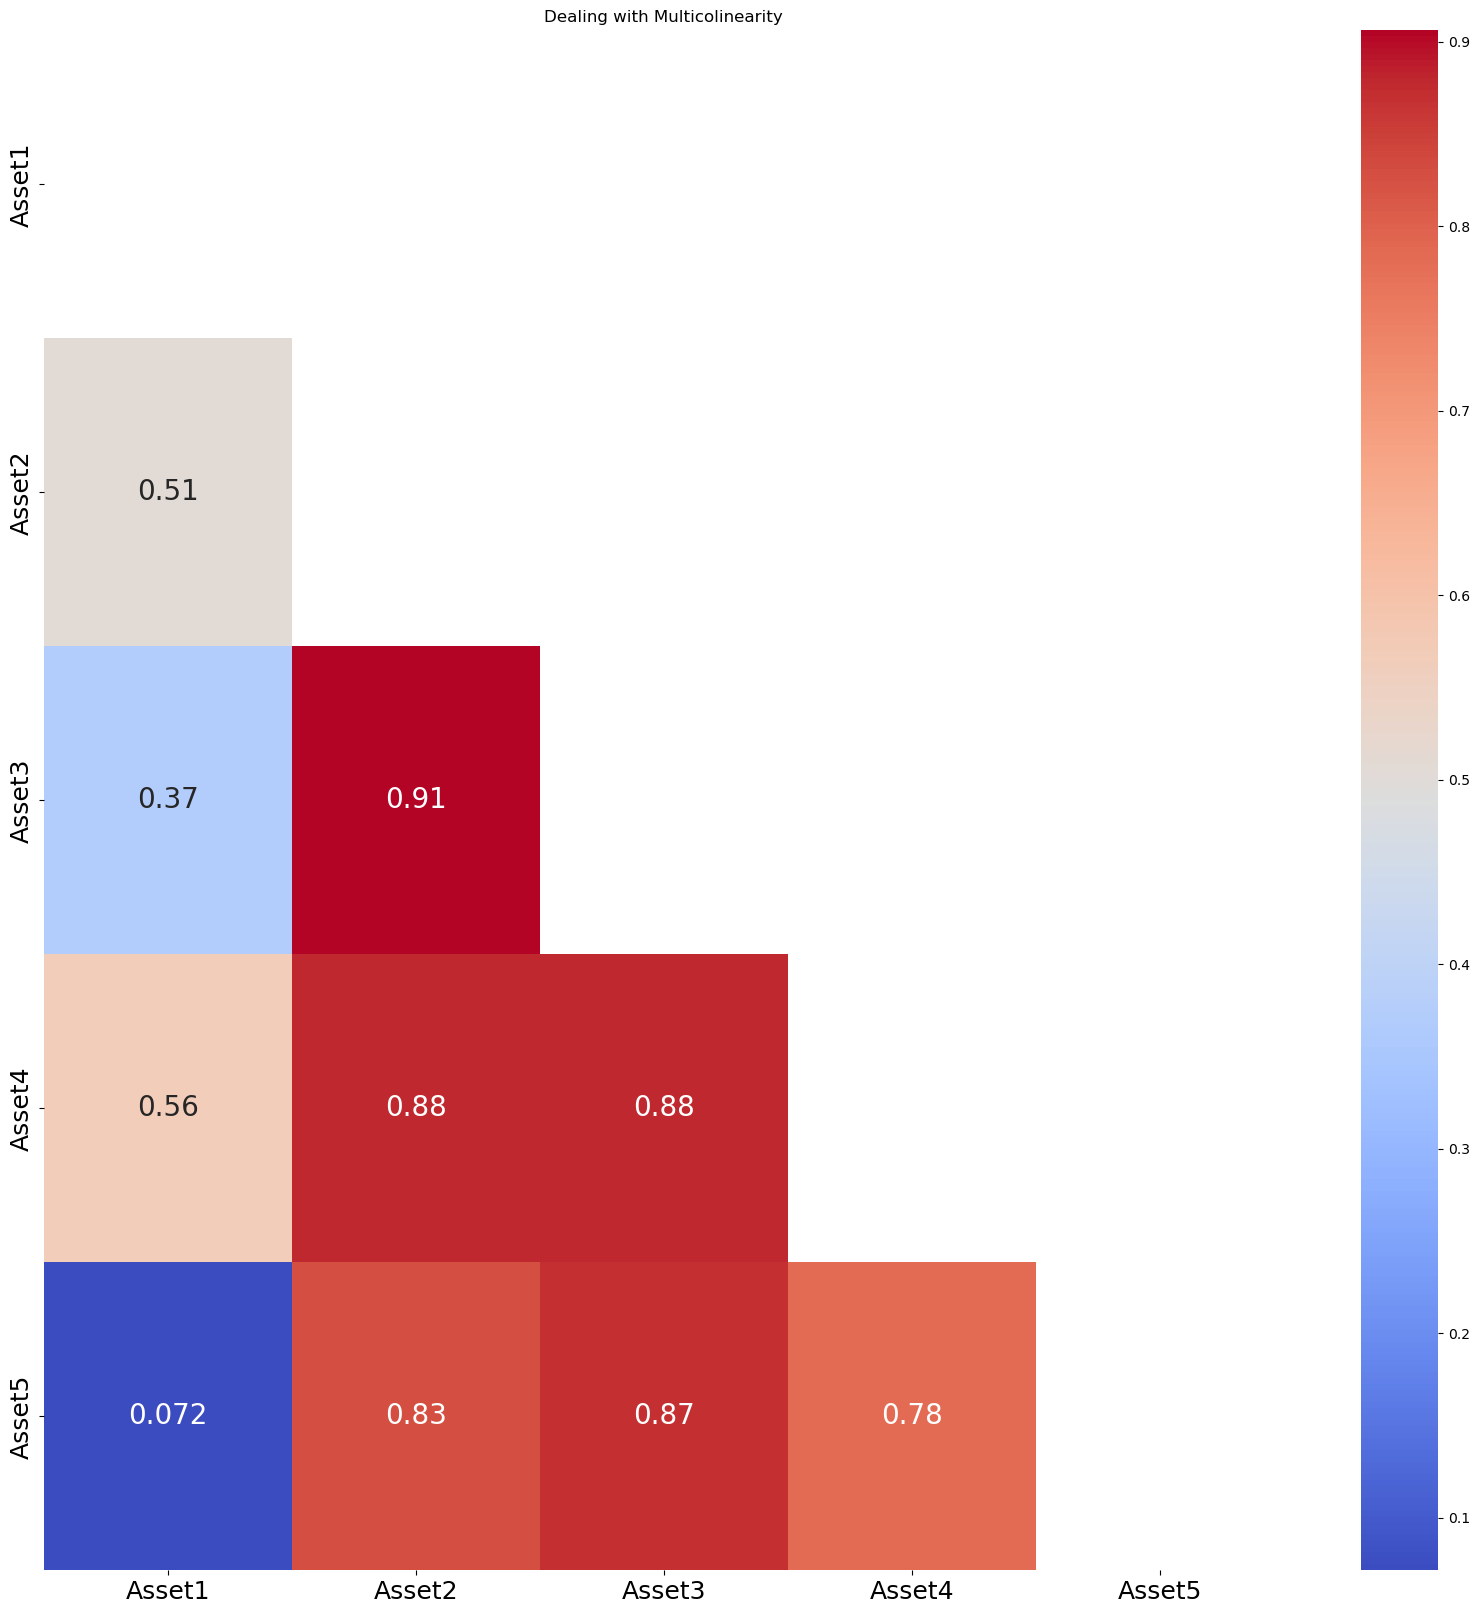

In [15]:
mask = np.triu(np.ones_like(num_corr, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(num_corr, cmap="coolwarm", annot=True,
            xticklabels="auto", yticklabels="auto",
            mask=mask, annot_kws={"size": 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Dealing with Multicolinearity")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [16]:
dfrendimientos

,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672
2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151


In [17]:
dfrendimientos.reset_index(inplace=True)

In [18]:
dfrendimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 783 non-null    datetime64[ns]
 1   Asset1_rendimientos  782 non-null    float64       
 2   Asset2_rendimientos  782 non-null    float64       
 3   Asset3_rendimientos  782 non-null    float64       
 4   Asset4_rendimientos  782 non-null    float64       
 5   Asset5_rendimientos  782 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 36.8 KB


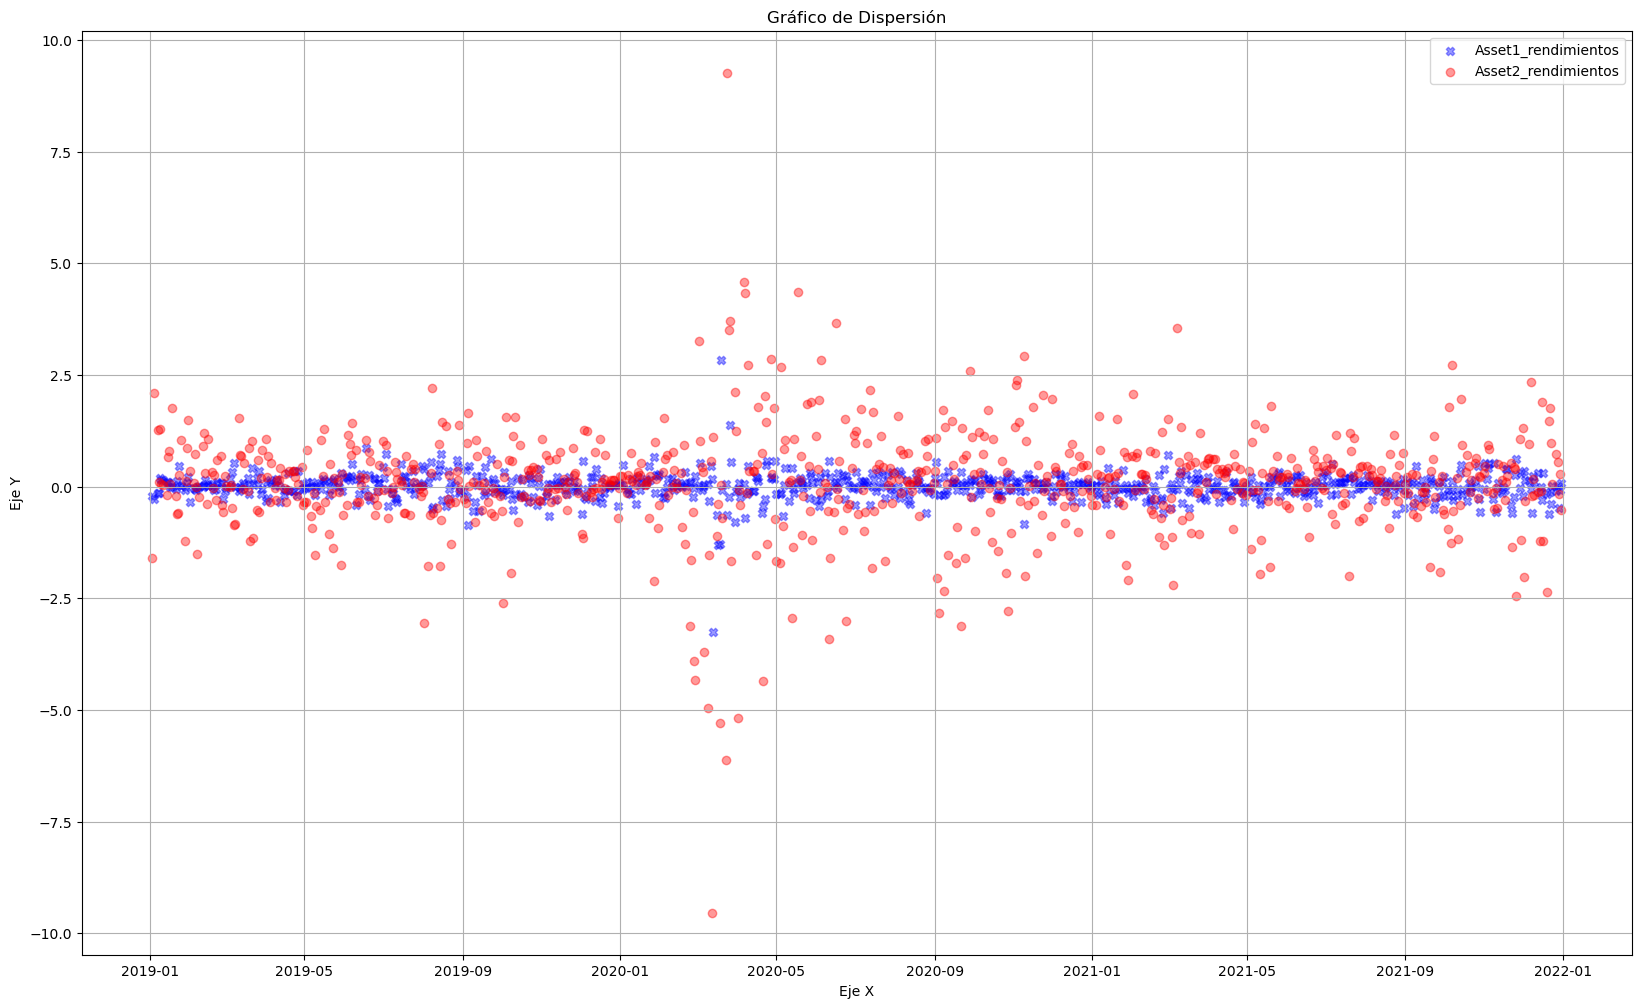

In [19]:
x1 = dfrendimientos["date"]
y1 = dfrendimientos["Asset1_rendimientos"]
x2 = dfrendimientos["date"]
y2 = dfrendimientos["Asset2_rendimientos"]
plt.figure(figsize=(20, 12), facecolor="lightgrey", frameon=False)
plt.scatter(x1, y1, label='Asset1_rendimientos', marker= "X", alpha=0.4, color="blue")
plt.scatter(x2, y2, label='Asset2_rendimientos', marker= "o", alpha=0.4, color="red")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()


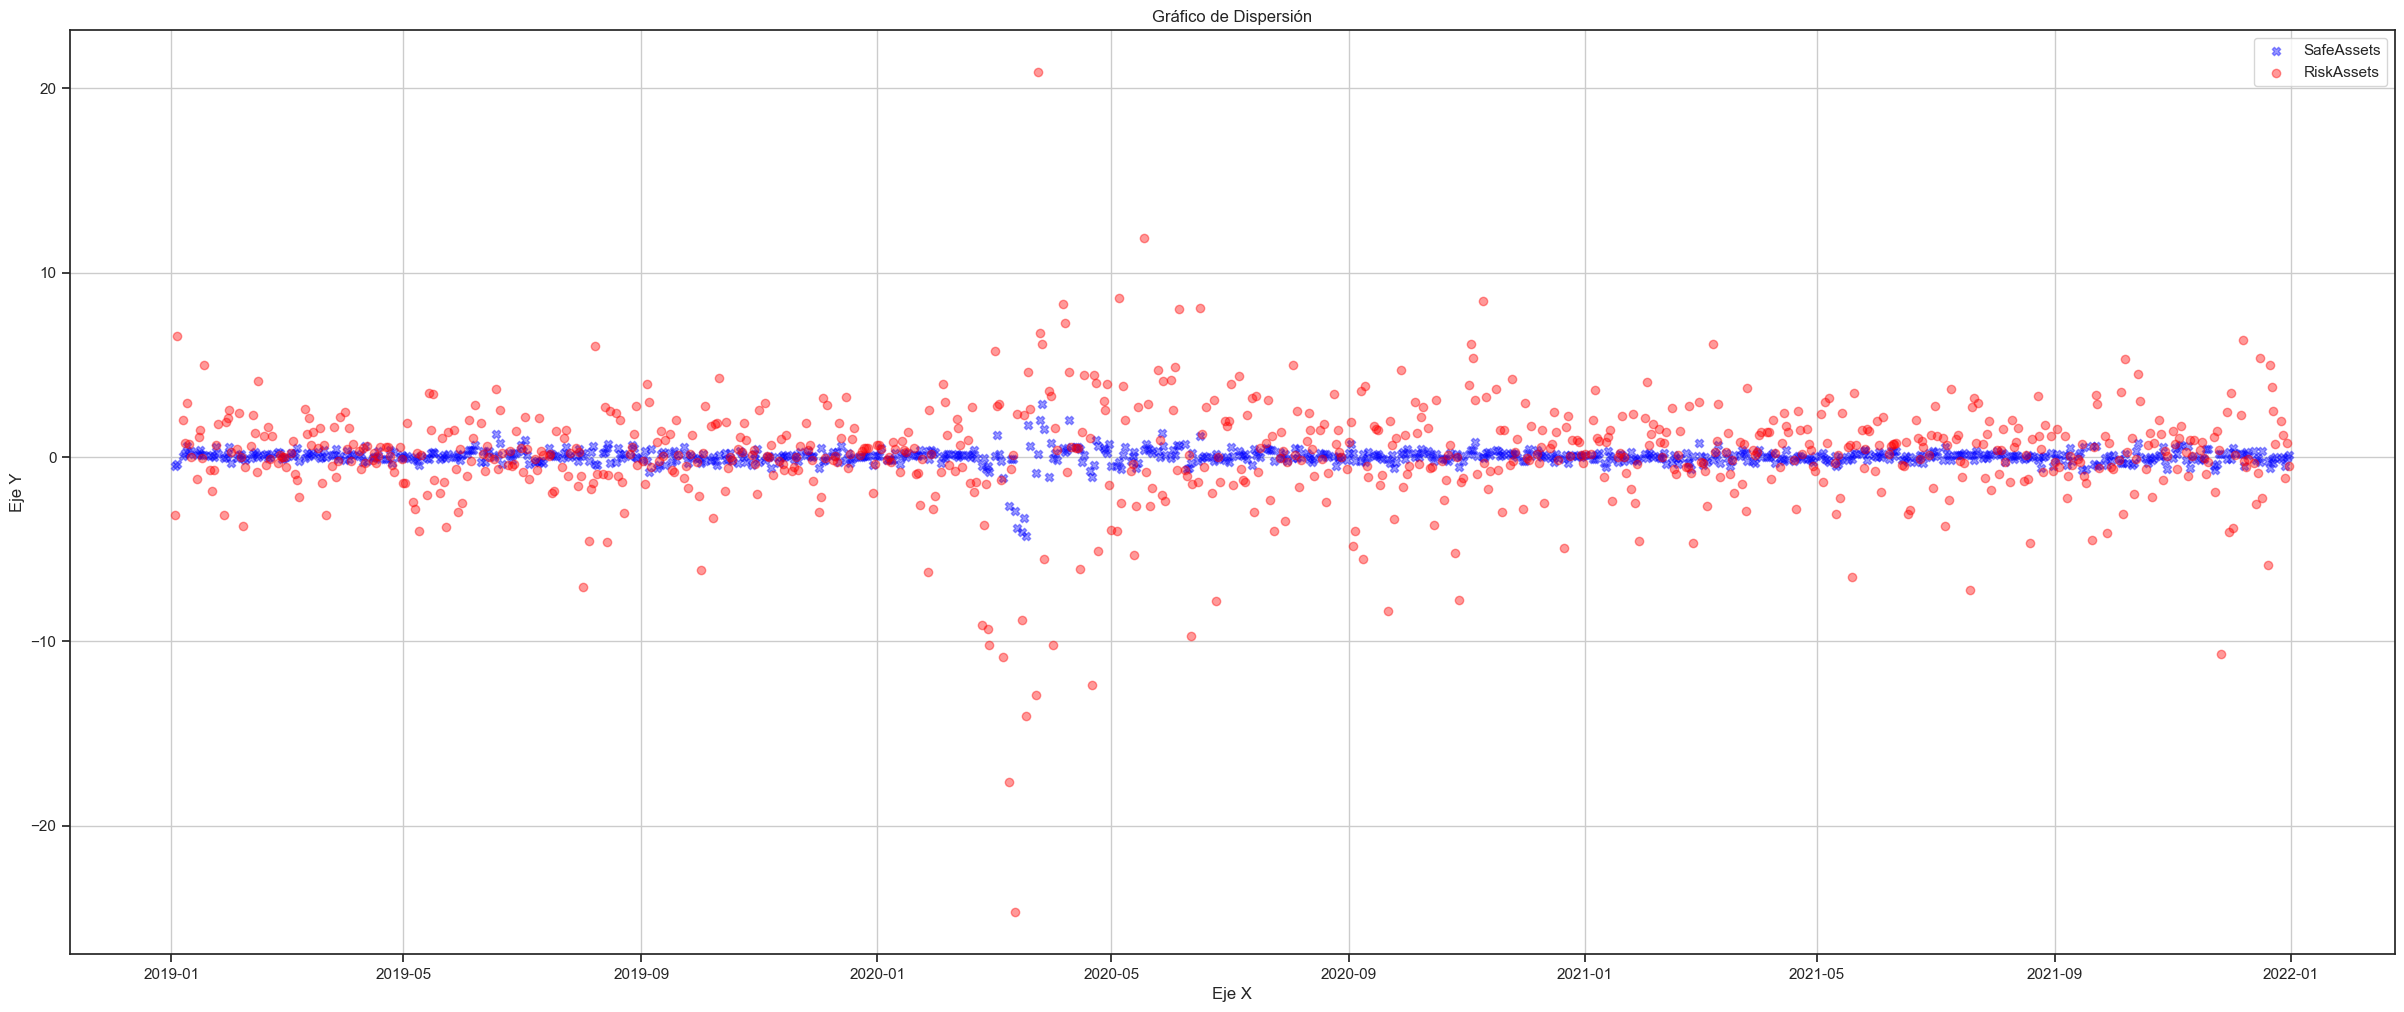

In [74]:
x1 = dfrendimientos["date"]
y1 = dfrendimientos["Asset1_rendimientos"] + dfrendimientos["Asset4_rendimientos"]
x2 = dfrendimientos["date"]
y2 = dfrendimientos["Asset2_rendimientos"] + dfrendimientos["Asset3_rendimientos"] + dfrendimientos["Asset5_rendimientos"]

plt.figure(figsize=(30, 12), facecolor="lightgrey", edgecolor="yellow", frameon=False)
plt.scatter(x1, y1, label='SafeAssets', marker= "X", alpha=0.4, color="blue")
plt.scatter(x2, y2, label='RiskAssets', marker= "o", alpha=0.4, color="red")

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()

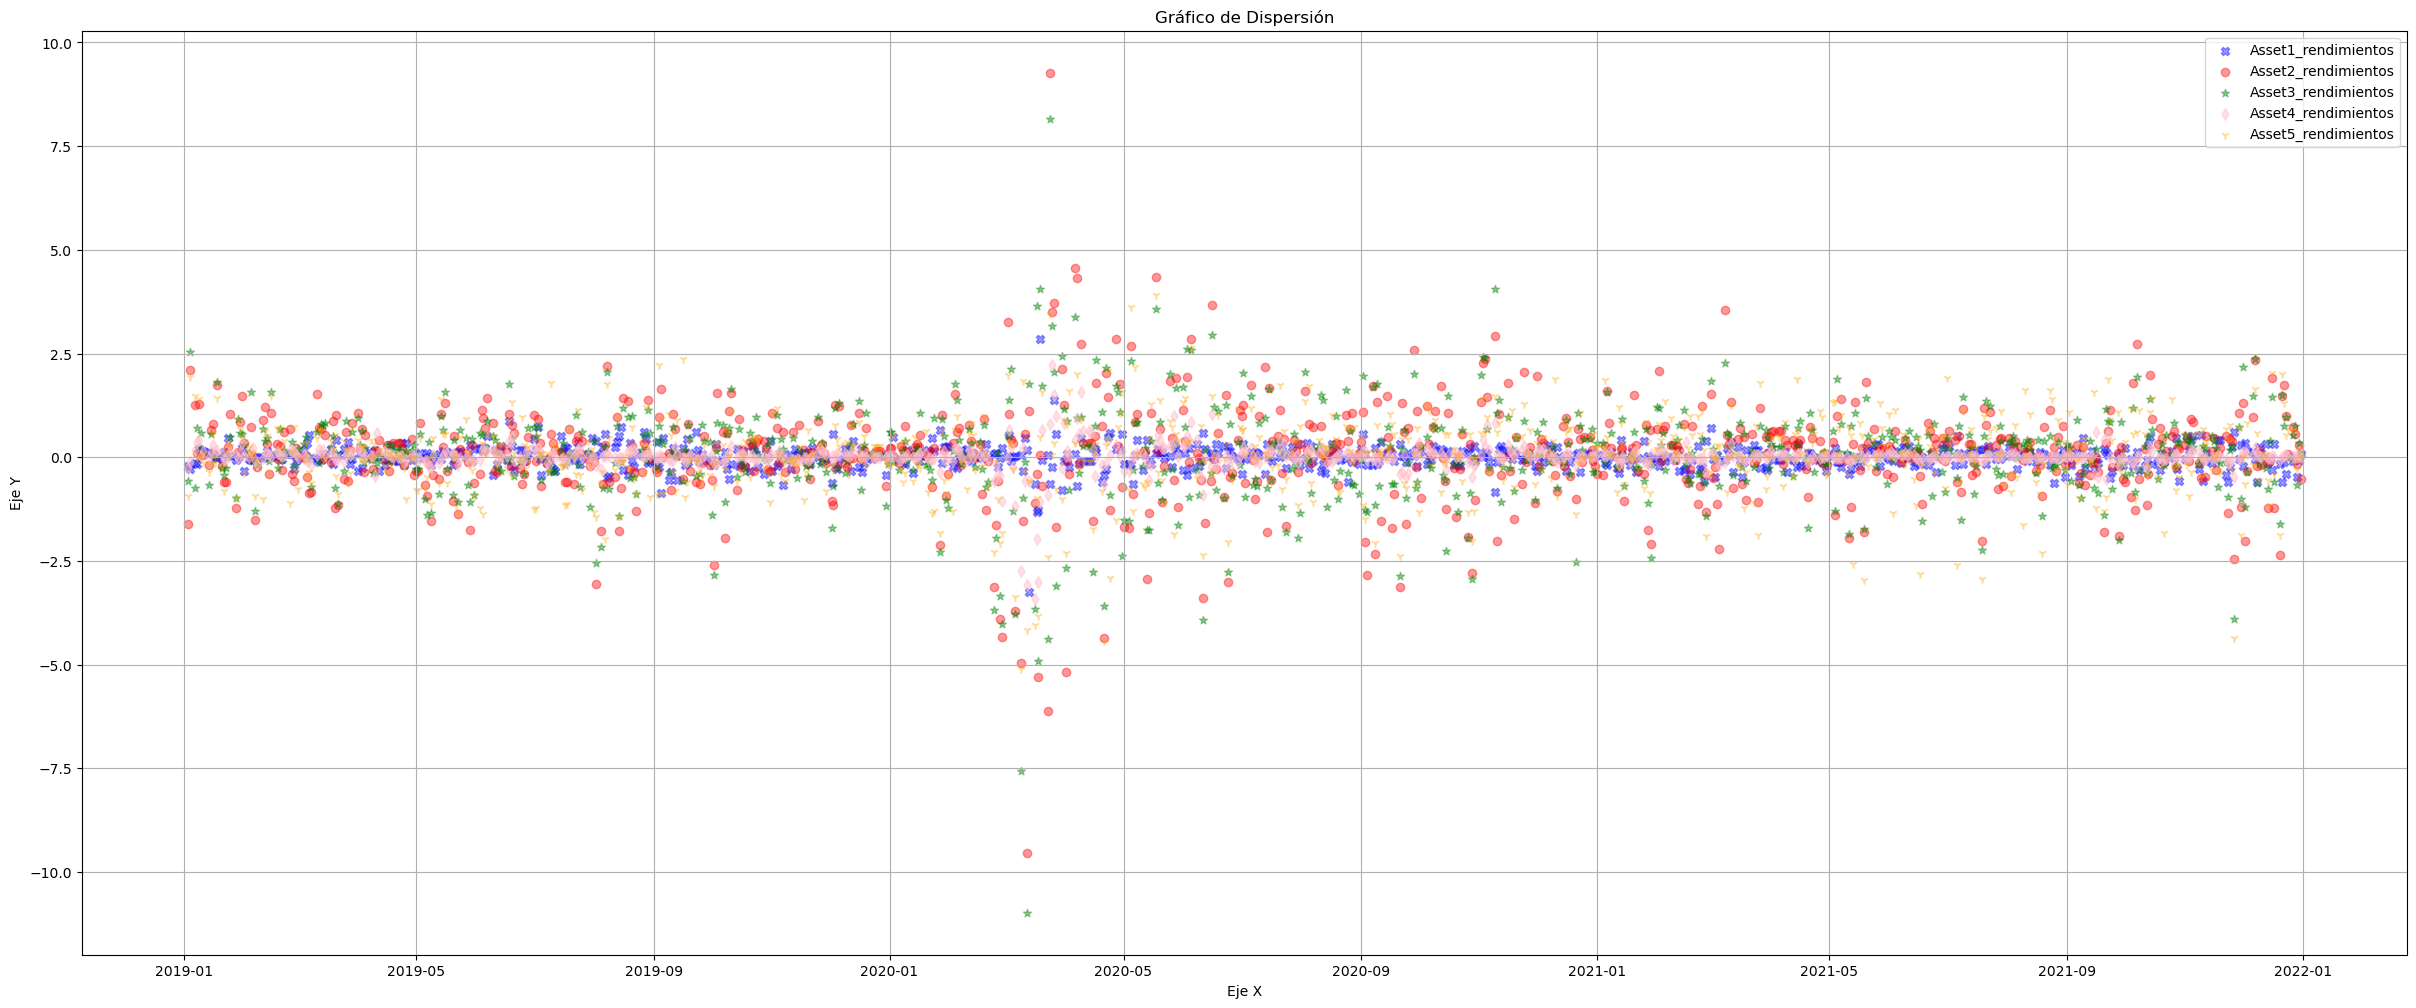

In [20]:
x1 = dfrendimientos["date"]
y1 = dfrendimientos["Asset1_rendimientos"]
x2 = dfrendimientos["date"]
y2 = dfrendimientos["Asset2_rendimientos"]
x3 = dfrendimientos["date"]
y3 = dfrendimientos["Asset3_rendimientos"]
x4 = dfrendimientos["date"]
y4 = dfrendimientos["Asset4_rendimientos"]
x5 = dfrendimientos["date"]
y5 = dfrendimientos["Asset5_rendimientos"]
plt.figure(figsize=(30, 12), facecolor="lightgrey", edgecolor="yellow", frameon=False)
plt.scatter(x1, y1, label='Asset1_rendimientos', marker= "X", alpha=0.4, color="blue")
plt.scatter(x2, y2, label='Asset2_rendimientos', marker= "o", alpha=0.4, color="red")
plt.scatter(x3, y3, label='Asset3_rendimientos', marker= "*", alpha=0.4, color="green")
plt.scatter(x4, y4, label='Asset4_rendimientos', marker= "d", alpha=0.5, color="pink")
plt.scatter(x5, y5, label='Asset5_rendimientos', marker= "1", alpha=0.4, color="orange")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

In [21]:
df2 = pd.read_csv("portfolio_weights.csv")
df2

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [22]:
df2['date'] = pd.to_datetime(df2['date'])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    783 non-null    datetime64[ns]
 1   Asset1  783 non-null    float64       
 2   Asset2  783 non-null    float64       
 3   Asset3  783 non-null    float64       
 4   Asset4  783 non-null    float64       
 5   Asset5  783 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 36.8 KB


<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

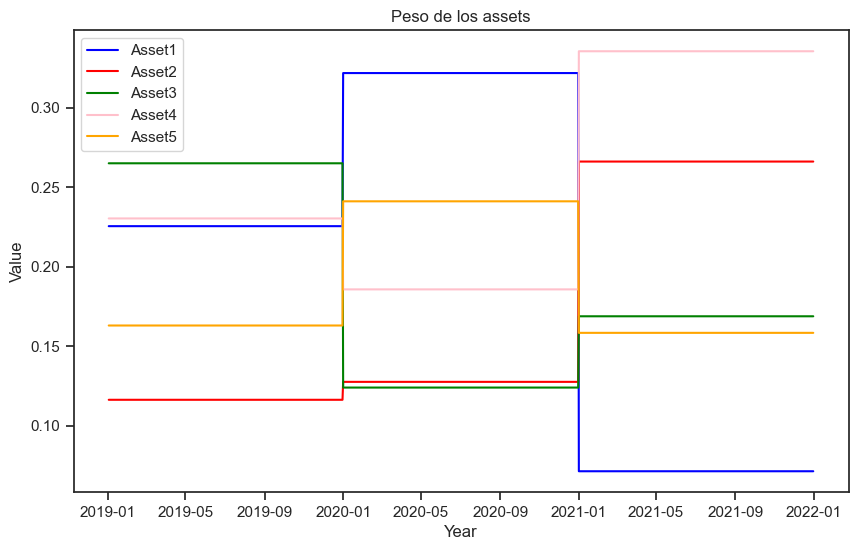

In [24]:
sns.set_theme(style="ticks", palette="bright")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Datos
x = df2['date']
y1 = df2['Asset1']
y2 = df2['Asset2']
y3 = df2['Asset3']
y4 = df2['Asset4']
y5 = df2['Asset5']

# Plot
plt.plot(x, y1, label="Asset1", color="blue")
plt.plot(x, y2, label="Asset2", color="red")
plt.plot(x, y3, label="Asset3", color="green")
plt.plot(x, y4, label="Asset4", color="pink")
plt.plot(x, y5, label="Asset5", color="orange")


# Personalización adicional
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Peso de los assets')

# Mostrar el gráfico
plt.show()

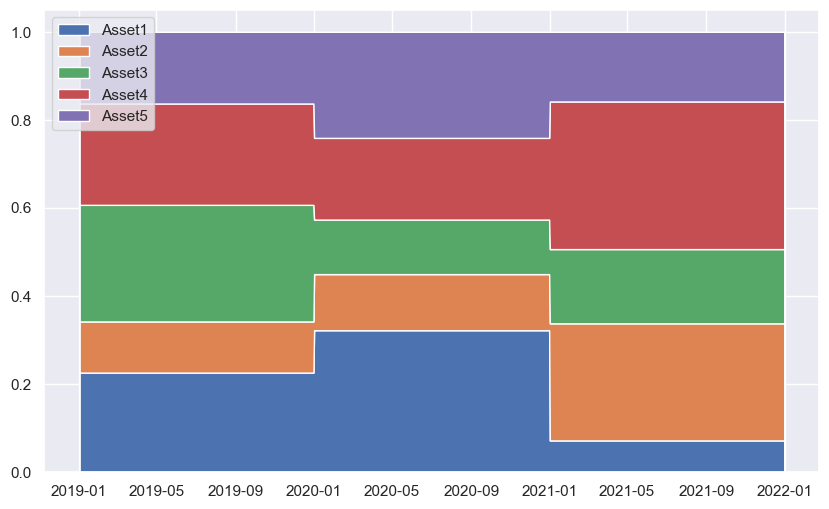

In [25]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 6))

x = df2['date']
y1 = df2['Asset1']
y2 = df2['Asset2']
y3 = df2['Asset3']
y4 = df2['Asset4']
y5 = df2['Asset5']
 
# Plot
plt.stackplot(x,y1, y2, y3, y4, y5, labels=["Asset1","Asset2","Asset3", "Asset4", "Asset5"])
plt.legend(loc='upper left')
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [26]:
dfrendimientos

,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672
779,2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246


In [27]:
dfrendimientos_acumulados = dfrendimientos.copy()

In [28]:
dfrendimientos_acumulados["Asset1_rendimientos_acumulados"] = dfrendimientos_acumulados["Asset1_rendimientos"].cumsum()
dfrendimientos_acumulados["Asset2_rendimientos_acumulados"] = dfrendimientos_acumulados["Asset2_rendimientos"].cumsum()
dfrendimientos_acumulados["Asset3_rendimientos_acumulados"] = dfrendimientos_acumulados["Asset3_rendimientos"].cumsum()
dfrendimientos_acumulados["Asset4_rendimientos_acumulados"] = dfrendimientos_acumulados["Asset4_rendimientos"].cumsum()
dfrendimientos_acumulados["Asset5_rendimientos_acumulados"] = dfrendimientos_acumulados["Asset5_rendimientos"].cumsum()



In [29]:
dfrendimientos_acumulados

,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos,Asset1_rendimientos_acumulados,Asset2_rendimientos_acumulados,Asset3_rendimientos_acumulados,Asset4_rendimientos_acumulados,Asset5_rendimientos_acumulados
0,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221,-0.477218,0.488263,1.955622,-0.383231,0.981011
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175,-0.628388,1.751425,1.221869,-0.197660,2.460185
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179,-0.781874,1.851710,1.925847,0.162874,2.441006
...,...,...,...,...,...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672,8.001497,67.708573,46.794101,12.672045,35.508269
779,2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106,8.007939,68.256882,47.554018,12.677885,35.394163
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151,7.521696,68.098069,46.889312,12.683726,35.080012
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246,7.452141,68.388411,47.223889,12.710006,35.223258


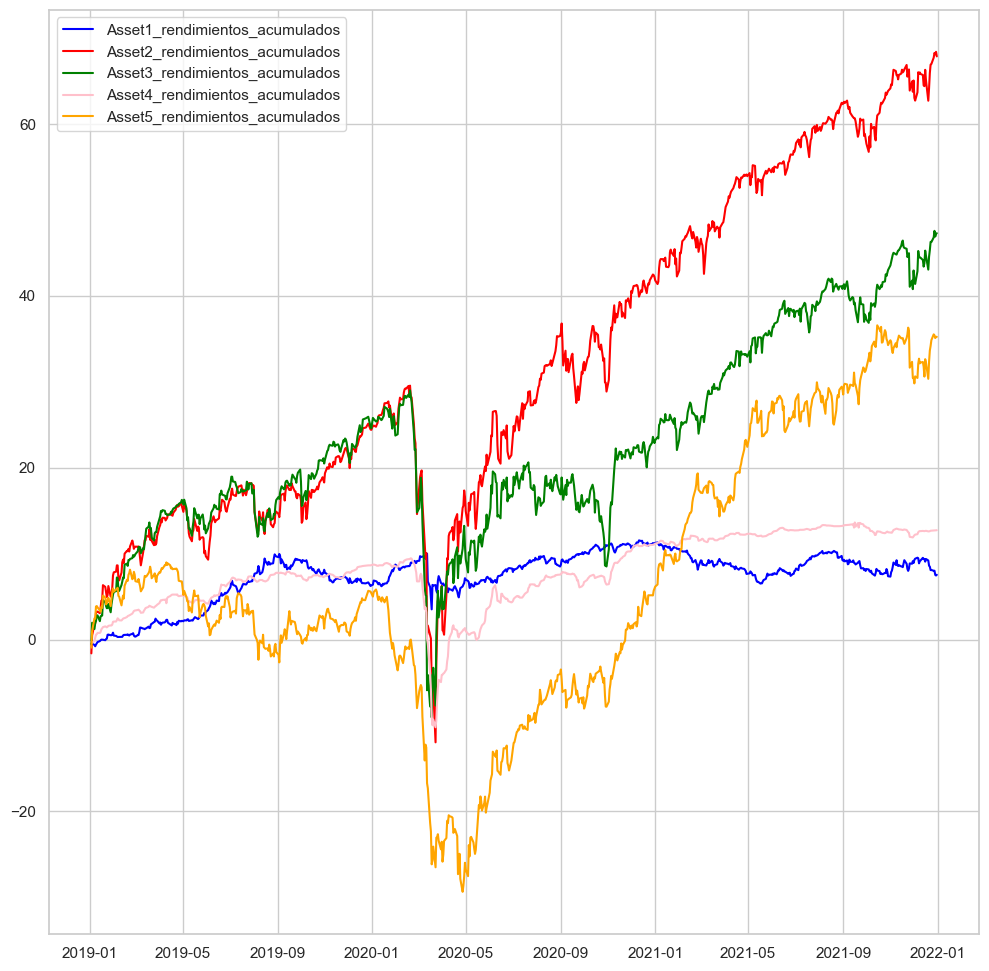

In [30]:
time = dfcopy["date"]
sns.set_style("whitegrid")
Asset11 = dfrendimientos_acumulados["Asset1_rendimientos_acumulados"]
Asset12 = dfrendimientos_acumulados["Asset2_rendimientos_acumulados"]
Asset13 = dfrendimientos_acumulados["Asset3_rendimientos_acumulados"]
Asset14 = dfrendimientos_acumulados["Asset4_rendimientos_acumulados"]
Asset15 = dfrendimientos_acumulados["Asset5_rendimientos_acumulados"]

fig, ax = plt.subplots(figsize=(12, 12))

# Plot lines
ax.plot(time, Asset11, color="blue", label="Asset1_rendimientos_acumulados")
ax.plot(time, Asset12, color="red", label="Asset2_rendimientos_acumulados")
ax.plot(time, Asset13, color="green", label="Asset3_rendimientos_acumulados")
ax.plot(time, Asset14, color="pink", label="Asset4_rendimientos_acumulados")
ax.plot(time, Asset15, color="orange", label="Asset5_rendimientos_acumulados")


ax.legend();



<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [31]:
dfrendimientos_acumulados.reset_index(inplace=True)

In [32]:
dfrendimientos_acumulados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           783 non-null    int64         
 1   date                            783 non-null    datetime64[ns]
 2   Asset1_rendimientos             782 non-null    float64       
 3   Asset2_rendimientos             782 non-null    float64       
 4   Asset3_rendimientos             782 non-null    float64       
 5   Asset4_rendimientos             782 non-null    float64       
 6   Asset5_rendimientos             782 non-null    float64       
 7   Asset1_rendimientos_acumulados  782 non-null    float64       
 8   Asset2_rendimientos_acumulados  782 non-null    float64       
 9   Asset3_rendimientos_acumulados  782 non-null    float64       
 10  Asset4_rendimientos_acumulados  782 non-null    float64       
 11  Asset5

In [33]:
fila_2019_12_31 = dfrendimientos_acumulados.loc[dfrendimientos_acumulados['date'] == '2019-12-31 00:00:00']
fila_2020_12_31 = dfrendimientos_acumulados.loc[dfrendimientos_acumulados['date'] == '2020-12-31 00:00:00']
fila_2021_12_31 = dfrendimientos_acumulados.loc[dfrendimientos_acumulados['date'] == '2021-12-31 00:00:00']
fila_2022_12_31 = dfrendimientos_acumulados.loc[dfrendimientos_acumulados['date'] == '2022-12-31 00:00:00']


In [34]:
df2019 = dfrendimientos_acumulados[dfrendimientos_acumulados["date"].dt.year == 2019]

In [35]:
df2019

,index,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos,Asset1_rendimientos_acumulados,Asset2_rendimientos_acumulados,Asset3_rendimientos_acumulados,Asset4_rendimientos_acumulados,Asset5_rendimientos_acumulados
0,0,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221,-0.477218,0.488263,1.955622,-0.383231,0.981011
3,3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175,-0.628388,1.751425,1.221869,-0.197660,2.460185
4,4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179,-0.781874,1.851710,1.925847,0.162874,2.441006
...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,2019-12-25,0.035322,0.154012,0.057225,0.008331,0.272993,6.579853,24.822494,25.805436,8.611941,5.127476
256,256,2019-12-26,0.035310,0.153775,0.057192,0.008331,0.272249,6.615162,24.976269,25.862627,8.620272,5.399726
257,257,2019-12-27,0.035297,0.153539,0.057159,0.008330,0.271510,6.650459,25.129809,25.919787,8.628602,5.671236
258,258,2019-12-30,-0.425884,-0.699683,-1.171094,0.003029,-0.093371,6.224575,24.430126,24.748693,8.631631,5.577865


In [36]:
dfrendimientos

,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672
779,2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246


### hago df de cada año con los rendimientos diarios para sacar el rendimiento anual

In [37]:
dfrendimientos_2019 = dfrendimientos.copy()
dfrendimientos_2019 = dfrendimientos_2019[dfrendimientos_2019["date"].dt.year == 2019]
for column in dfrendimientos_2019.columns[1:]:
    dfrendimientos_2019[column] = dfrendimientos_2019[column].cumsum()
dfrendimientos_acumulados2019 = pd.DataFrame(dfrendimientos_2019)
dfrendimientos_acumulados2019


,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.477218,0.488263,1.955622,-0.383231,0.981011
3,2019-01-07,-0.628388,1.751425,1.221869,-0.197660,2.460185
4,2019-01-08,-0.781874,1.851710,1.925847,0.162874,2.441006
...,...,...,...,...,...,...
255,2019-12-25,6.579853,24.822494,25.805436,8.611941,5.127476
256,2019-12-26,6.615162,24.976269,25.862627,8.620272,5.399726
257,2019-12-27,6.650459,25.129809,25.919787,8.628602,5.671236
258,2019-12-30,6.224575,24.430126,24.748693,8.631631,5.577865


In [38]:
rendimiento_anual_2019 = []
for column in dfrendimientos_acumulados2019.columns[1:]:
    rendimiento_anual_2019.append(dfrendimientos_acumulados2019[column][259:].unique())
rendimiento_anual_2019

[array([6.30581846]),
 array([24.40329665]),
 array([24.57528221]),
 array([8.65586046]),
 array([5.38471885])]

In [39]:
dfrendimientos_2020 = dfrendimientos.copy()
dfrendimientos_2020 = dfrendimientos_2020[dfrendimientos_2020["date"].dt.year == 2020]
for column in dfrendimientos_2020.columns[1:]:
    dfrendimientos_2020[column] = dfrendimientos_2020[column].cumsum()
dfrendimientos_acumulados2020 = pd.DataFrame(dfrendimientos_2020)
dfrendimientos_acumulados2020

,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
260,2020-01-01,0.039615,0.231638,0.607991,0.024224,-0.193520
261,2020-01-02,0.079214,0.462742,1.212307,0.048442,-0.387416
262,2020-01-03,0.558228,0.500701,1.097891,0.072655,0.138999
263,2020-01-06,0.485574,0.355947,0.797204,0.004574,0.438232
264,2020-01-07,0.426035,0.616320,0.797204,-0.063553,0.177184
...,...,...,...,...,...,...
517,2020-12-25,4.748798,17.406457,-2.098148,2.336366,-0.236779
518,2020-12-28,4.815133,17.896738,-1.668622,2.346264,-0.236779
519,2020-12-29,4.917332,18.074934,-0.987487,2.356160,-0.255896
520,2020-12-30,4.880591,17.993968,-1.349350,2.403661,0.298597


In [40]:
rendimiento_anual_2020 = []
for column in dfrendimientos_acumulados2020.columns[1:]:
    rendimiento_anual_2020.append(dfrendimientos_acumulados2020[column][261:].unique())
rendimiento_anual_2020

[array([4.89798064]),
 array([17.79384557]),
 array([-1.71252729]),
 array([2.42739956]),
 array([0.53945413])]

In [41]:
dfrendimientos_2021 = dfrendimientos.copy()
dfrendimientos_2021 = dfrendimientos_2021[dfrendimientos_2021["date"].dt.year == 2021]
for column in dfrendimientos_2021.columns[1:]:
    dfrendimientos_2021[column] = dfrendimientos_2021[column].cumsum()
dfrendimientos_acumulados2021 = pd.DataFrame(dfrendimientos_2021)
dfrendimientos_acumulados2021

,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
522,2021-01-01,0.045113,-0.415196,0.340729,0.075650,0.240278
523,2021-01-04,0.090206,-0.832122,0.680301,0.151242,0.479980
524,2021-01-05,-0.051821,-0.557969,0.538636,0.180864,2.330084
525,2021-01-06,-0.232715,1.029254,2.114928,0.234167,2.812012
526,2021-01-07,-0.228446,1.843955,2.239075,0.349596,2.885799
...,...,...,...,...,...,...
778,2021-12-27,-3.202302,25.511431,23.931346,1.588785,29.584096
779,2021-12-28,-3.195860,26.059739,24.691263,1.594625,29.469990
780,2021-12-29,-3.682103,25.900927,24.026557,1.600466,29.155839
781,2021-12-30,-3.751658,26.191268,24.361134,1.626746,29.299085


In [42]:
rendimiento_anual_2021 = []
for column in dfrendimientos_acumulados2021.columns[1:]:
    rendimiento_anual_2021.append(dfrendimientos_acumulados2021[column][260:].unique())
rendimiento_anual_2021

[array([-3.6687772]),
 array([25.65908414]),
 array([24.41243568]),
 array([1.63842347]),
 array([29.29908468])]

In [43]:
rendimientos2019 = [lista[0] for lista in rendimiento_anual_2019]
rendimientos2020 = [lista[0] for lista in rendimiento_anual_2020]
rendimientos2021 = [lista[0] for lista in rendimiento_anual_2021]

In [44]:
dfrendimientoanuales = {2019: rendimientos2019, 2020: rendimientos2020, 2021: rendimientos2021, "assets": dfrendimientos_2021.columns[1:]}

In [45]:
dfrendimientoanuales = pd.DataFrame(dfrendimientoanuales)

In [46]:
dfrendimientoanuales = dfrendimientoanuales.set_index("assets")

In [47]:
dfrendimientoanuales = dfrendimientoanuales.T

In [48]:
dfrendimientoanuales

assets,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos
2019,6.305818,24.403297,24.575282,8.655860,5.384719
2020,4.897981,17.793846,-1.712527,2.427400,0.539454
2021,-3.668777,25.659084,24.412436,1.638423,29.299085


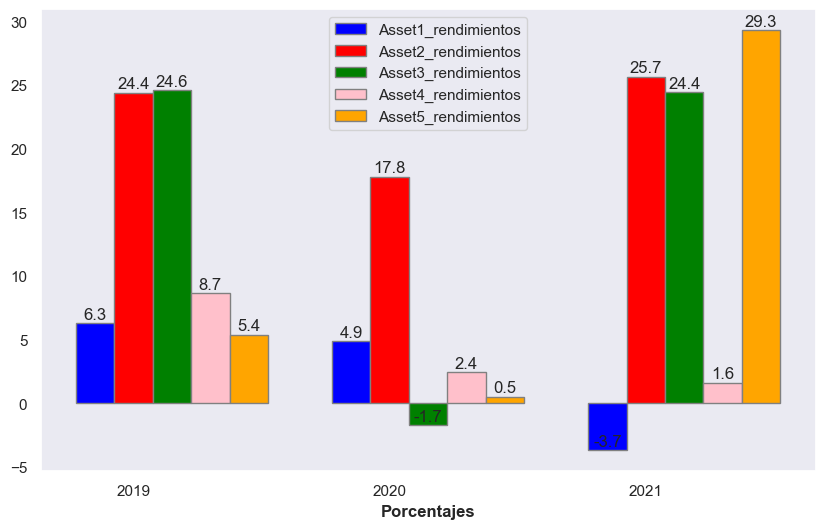

In [49]:
barWidth = 0.15
sns.set_style("dark")
plt.figure(figsize=(10, 6)) 

bars1 = dfrendimientoanuales["Asset1_rendimientos"]
bars2 = dfrendimientoanuales["Asset2_rendimientos"]
bars3 = dfrendimientoanuales["Asset3_rendimientos"]
bars4 = dfrendimientoanuales["Asset4_rendimientos"]
bars5 = dfrendimientoanuales["Asset5_rendimientos"] 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, bars1, color="blue", width=barWidth, edgecolor='grey', label='Asset1_rendimientos', align="center")
plt.bar(r2, bars2, color="red", width=barWidth, edgecolor='grey', label='Asset2_rendimientos', align="center")
plt.bar(r3, bars3, color="green", width=barWidth, edgecolor='grey', label='Asset3_rendimientos', align="center")
plt.bar(r4, bars4, color="pink", width=barWidth, edgecolor='grey', label='Asset4_rendimientos', align="center")
plt.bar(r5, bars5, color="orange", width=barWidth, edgecolor='grey', label='Asset5_rendimientos', align="center")

for r, bar1, bar2, bar3, bar4, bar5 in zip(r1, bars1, bars2, bars3, bars4, bars5):
    plt.text(r, bar1 + 0.1, f'{bar1:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + barWidth, bar2 + 0.1, f'{bar2:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 2*barWidth, bar3 + 0.1, f'{bar3:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 3*barWidth, bar4 + 0.1, f'{bar4:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 4*barWidth, bar5 + 0.1, f'{bar5:.1f}', ha='center', va='bottom', rotation=0)
 
plt.xlabel('Porcentajes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [2019, 2020, 2021])
 
plt.legend()
plt.show()

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [50]:
dfvolatilidad = dfrendimientoanuales.copy()

In [51]:
dfvolatilidad["volatilidad1"] = [dfrendimientos_acumulados2019["Asset1_rendimientos"].std(), 
                                 dfrendimientos_acumulados2020["Asset1_rendimientos"].std(), 
                                 dfrendimientos_acumulados2021["Asset1_rendimientos"].std()]
dfvolatilidad["volatilidad2"] = [dfrendimientos_acumulados2019["Asset2_rendimientos"].std(),
                                 dfrendimientos_acumulados2020["Asset2_rendimientos"].std(),
                                 dfrendimientos_acumulados2021["Asset2_rendimientos"].std()]
dfvolatilidad["volatilidad3"] = [dfrendimientos_acumulados2019["Asset3_rendimientos"].std(),
                                 dfrendimientos_acumulados2020["Asset3_rendimientos"].std(),
                                 dfrendimientos_acumulados2021["Asset3_rendimientos"].std()]
dfvolatilidad["volatilidad4"] = [dfrendimientos_acumulados2019["Asset4_rendimientos"].std(),
                                 dfrendimientos_acumulados2020["Asset4_rendimientos"].std(),
                                 dfrendimientos_acumulados2021["Asset4_rendimientos"].std()]
dfvolatilidad["volatilidad5"] = [dfrendimientos_acumulados2019["Asset5_rendimientos"].std(),
                                 dfrendimientos_acumulados2020["Asset5_rendimientos"].std(),
                                 dfrendimientos_acumulados2021["Asset5_rendimientos"].std()]

In [52]:
dfvolatilidad

assets,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos,volatilidad1,volatilidad2,volatilidad3,volatilidad4,volatilidad5
2019,6.305818,24.403297,24.575282,8.655860,5.384719,3.228600,5.013118,5.651256,2.206571,2.754710
2020,4.897981,17.793846,-1.712527,2.427400,0.539454,1.791077,10.775895,7.154121,4.327537,9.350434
2021,-3.668777,25.659084,24.412436,1.638423,29.299085,1.044869,7.131558,6.631886,0.631399,8.010388


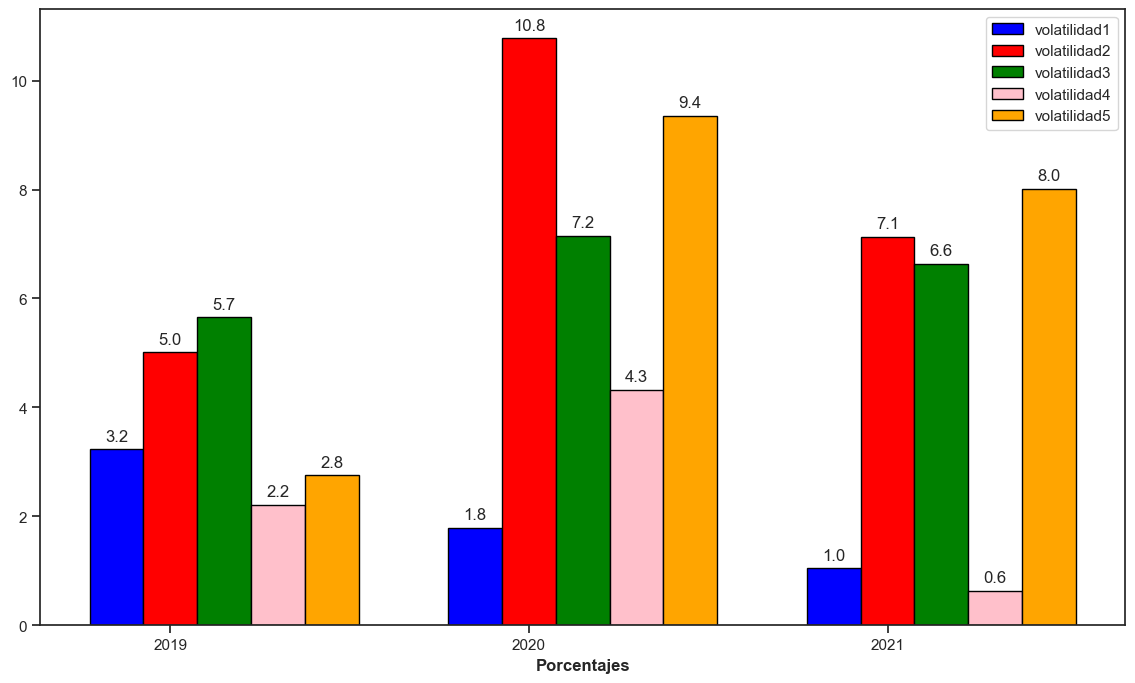

In [53]:
barWidth = 0.15
sns.set_style("ticks")
plt.figure(figsize=(14, 8)) 

bars1 = dfvolatilidad["volatilidad1"]
bars2 = dfvolatilidad["volatilidad2"]
bars3 = dfvolatilidad["volatilidad3"]
bars4 = dfvolatilidad["volatilidad4"]
bars5 = dfvolatilidad["volatilidad5"]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, bars1, color="blue", width=barWidth, edgecolor='black', label='volatilidad1', align="center")
plt.bar(r2, bars2, color="red", width=barWidth, edgecolor='black', label='volatilidad2', align="center")
plt.bar(r3, bars3, color="green", width=barWidth, edgecolor='black', label='volatilidad3', align="center")
plt.bar(r4, bars4, color="pink", width=barWidth, edgecolor='black', label='volatilidad4', align="center")
plt.bar(r5, bars5, color="orange", width=barWidth, edgecolor='black', label='volatilidad5', align="center")

for r, bar1, bar2, bar3, bar4, bar5 in zip(r1, bars1, bars2, bars3, bars4, bars5):
    plt.text(r, bar1 + 0.1, f'{bar1:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + barWidth, bar2 + 0.1, f'{bar2:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 2*barWidth, bar3 + 0.1, f'{bar3:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 3*barWidth, bar4 + 0.1, f'{bar4:.1f}', ha='center', va='bottom', rotation=0)
    plt.text(r + 4*barWidth, bar5 + 0.1, f'{bar5:.1f}', ha='center', va='bottom', rotation=0)
 
plt.xlabel('Porcentajes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [2019, 2020, 2021])
 
plt.legend()
plt.show()

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [54]:
dfcartera1 = df.copy()
dfcartera1

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [55]:
dfcartera1['date'] = pd.to_datetime(dfcartera1['date'])

In [56]:
for column in dfcartera1.columns:
    dfcartera1[column] = dfcartera1[column].interpolate(method='linear', limit_direction='forward', axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


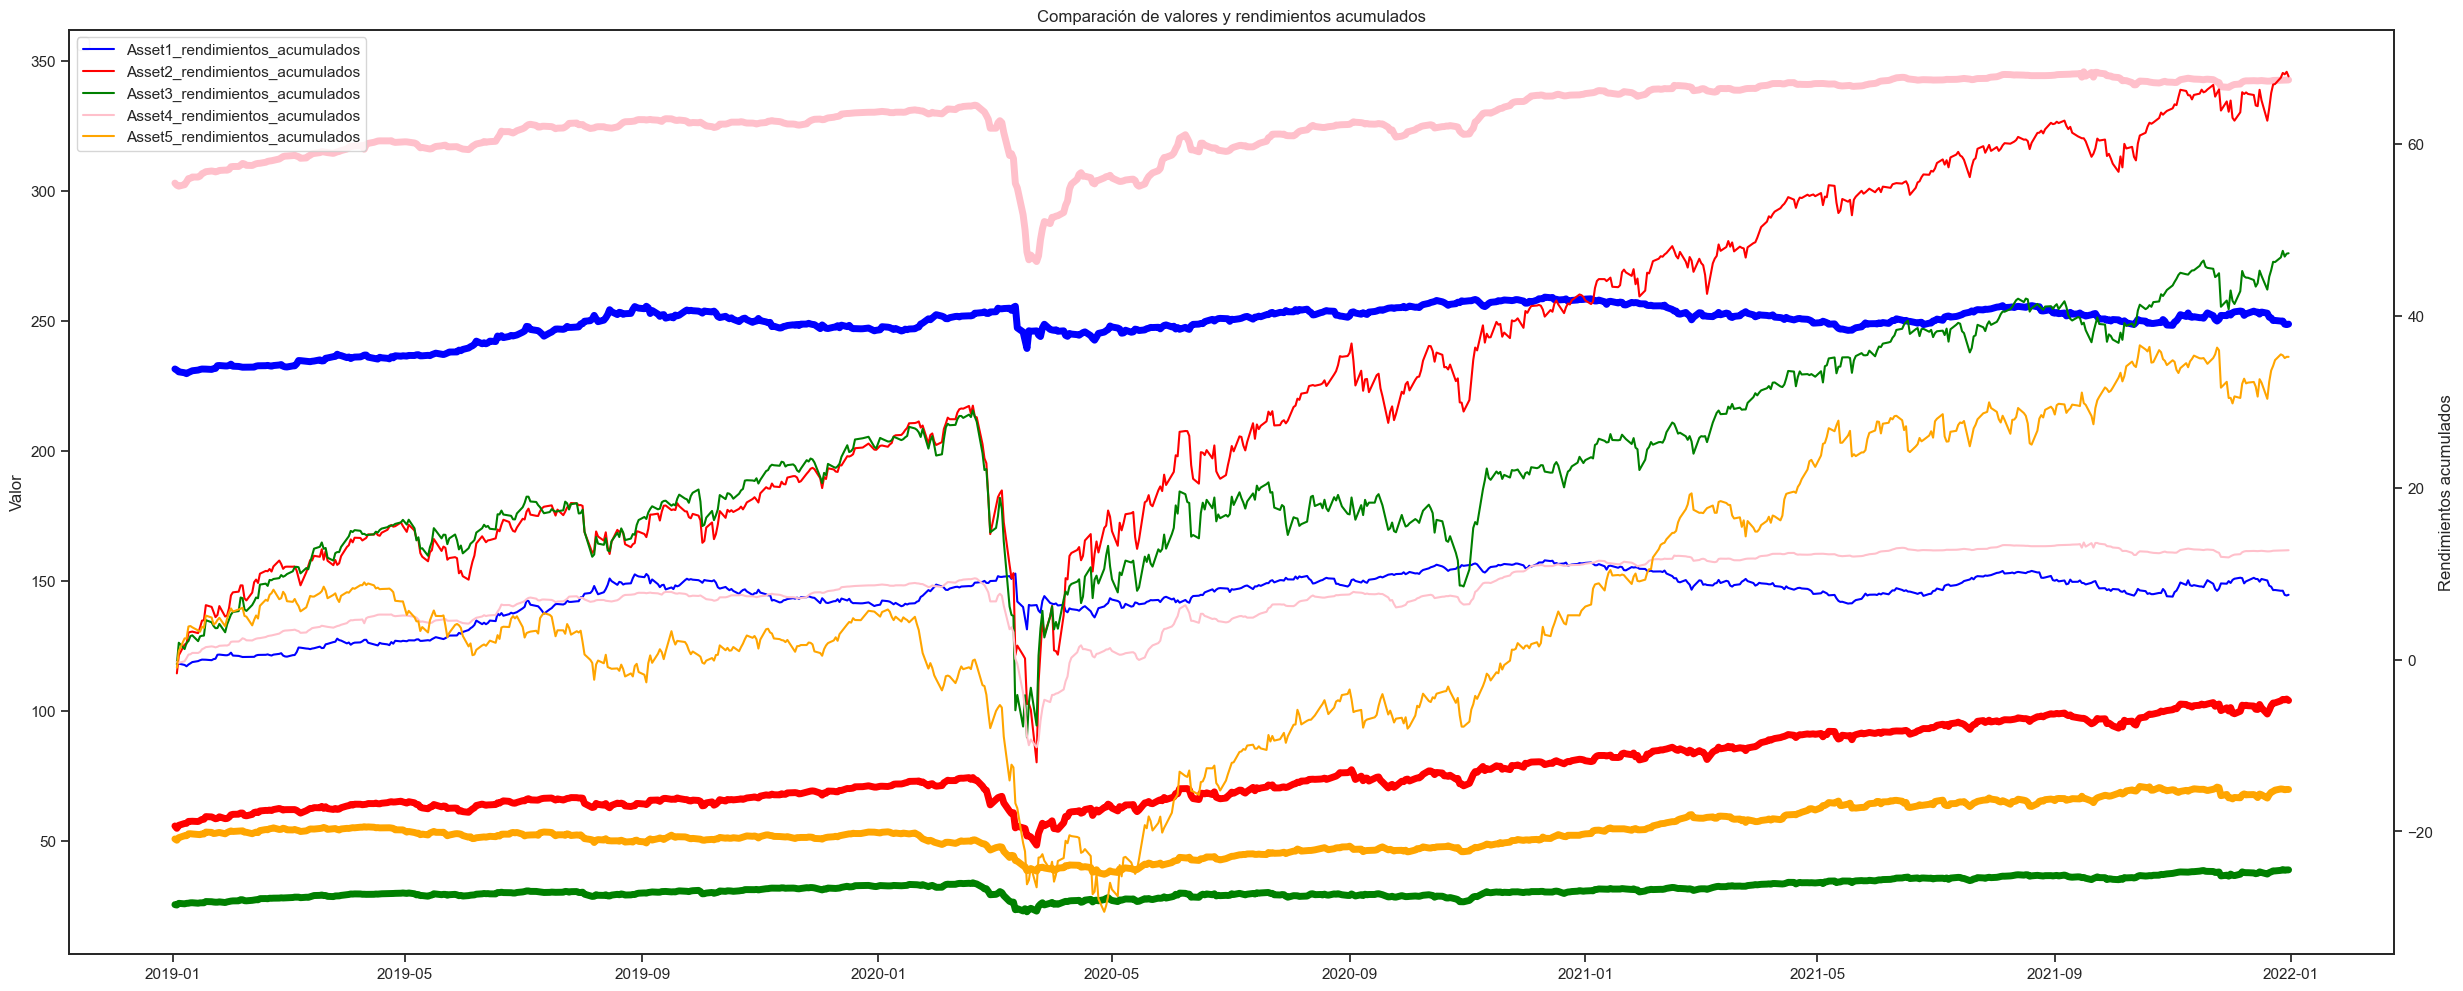

In [57]:
fig, ax = plt.subplots(figsize=(30, 12))
time = dfcartera1["date"]
Asset1 = dfcartera1["Asset1"]
Asset2 = dfcartera1["Asset2"]
Asset3 = dfcartera1["Asset3"]
Asset4 = dfcartera1["Asset4"]
Asset5 = dfcartera1["Asset5"]
ax.plot(time, Asset1, color="blue", linewidth=5)
ax.plot(time, Asset2, color="red", linewidth=5)
ax.plot(time, Asset3, color="green", linewidth=5)
ax.plot(time, Asset4, color="pink", linewidth=5)
ax.plot(time, Asset5, color="orange", linewidth=5)
ax2 = ax.twinx()
time = dfcopy["date"]
Asset11 = dfrendimientos_acumulados["Asset1_rendimientos_acumulados"]
Asset12 = dfrendimientos_acumulados["Asset2_rendimientos_acumulados"]
Asset13 = dfrendimientos_acumulados["Asset3_rendimientos_acumulados"]
Asset14 = dfrendimientos_acumulados["Asset4_rendimientos_acumulados"]
Asset15 = dfrendimientos_acumulados["Asset5_rendimientos_acumulados"]
ax2.plot(time, Asset11, color="blue", label="Asset1_rendimientos_acumulados")
ax2.plot(time, Asset12, color="red", label="Asset2_rendimientos_acumulados")
ax2.plot(time, Asset13, color="green", label="Asset3_rendimientos_acumulados")
ax2.plot(time, Asset14, color="pink", label="Asset4_rendimientos_acumulados")
ax2.plot(time, Asset15, color="orange", label="Asset5_rendimientos_acumulados")
ax.legend(loc="upper left")
ax2.legend(loc="upper left")
ax.set_ylabel("Valor")
ax2.set_ylabel("Rendimientos acumulados")
plt.title("Comparación de valores y rendimientos acumulados")
plt.show()


In [58]:
dfcartera1["assetssafe"] = dfcartera1["Asset1"] + dfcartera1["Asset4"]
dfcartera1["assetsrisk"] = dfcartera1["Asset2"] + dfcartera1["Asset3"] + dfcartera1["Asset5"]
dfrendimientos_acumulados["assetssafe"] = dfrendimientos_acumulados["Asset1_rendimientos_acumulados"] + dfrendimientos_acumulados["Asset4_rendimientos_acumulados"]
dfrendimientos_acumulados["assetsrisk"] = dfrendimientos_acumulados["Asset2_rendimientos_acumulados"] + dfrendimientos_acumulados["Asset3_rendimientos_acumulados"] + dfrendimientos_acumulados["Asset5_rendimientos_acumulados"]

In [59]:
dfcartera1

,date,Asset1,Asset2,Asset3,Asset4,Asset5,assetssafe,assetsrisk
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,534.4361,132.414222
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,533.1456,130.890047
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,532.1726,133.656133
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,532.3843,134.933277
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,533.1212,135.162997
...,...,...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.42,70.11,592.3407,212.886000
779,2021-12-28,249.9368,104.526,39.115000,342.44,70.03,592.3768,213.671000
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81,591.1815,213.025000
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91,591.0985,213.558000


In [60]:
dfrendimientos_acumulados

,index,date,Asset1_rendimientos,Asset2_rendimientos,Asset3_rendimientos,Asset4_rendimientos,Asset5_rendimientos,Asset1_rendimientos_acumulados,Asset2_rendimientos_acumulados,Asset3_rendimientos_acumulados,Asset4_rendimientos_acumulados,Asset5_rendimientos_acumulados,assetssafe,assetsrisk
0,0,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211,-0.473924,-3.120272
2,2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221,-0.477218,0.488263,1.955622,-0.383231,0.981011,-0.860450,3.424895
3,3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175,-0.628388,1.751425,1.221869,-0.197660,2.460185,-0.826048,5.433479
4,4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179,-0.781874,1.851710,1.925847,0.162874,2.441006,-0.619000,6.218562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,778,2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672,8.001497,67.708573,46.794101,12.672045,35.508269,20.673542,150.010943
779,779,2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106,8.007939,68.256882,47.554018,12.677885,35.394163,20.685825,151.205063
780,780,2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151,7.521696,68.098069,46.889312,12.683726,35.080012,20.205422,150.067393
781,781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246,7.452141,68.388411,47.223889,12.710006,35.223258,20.162147,150.835557


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


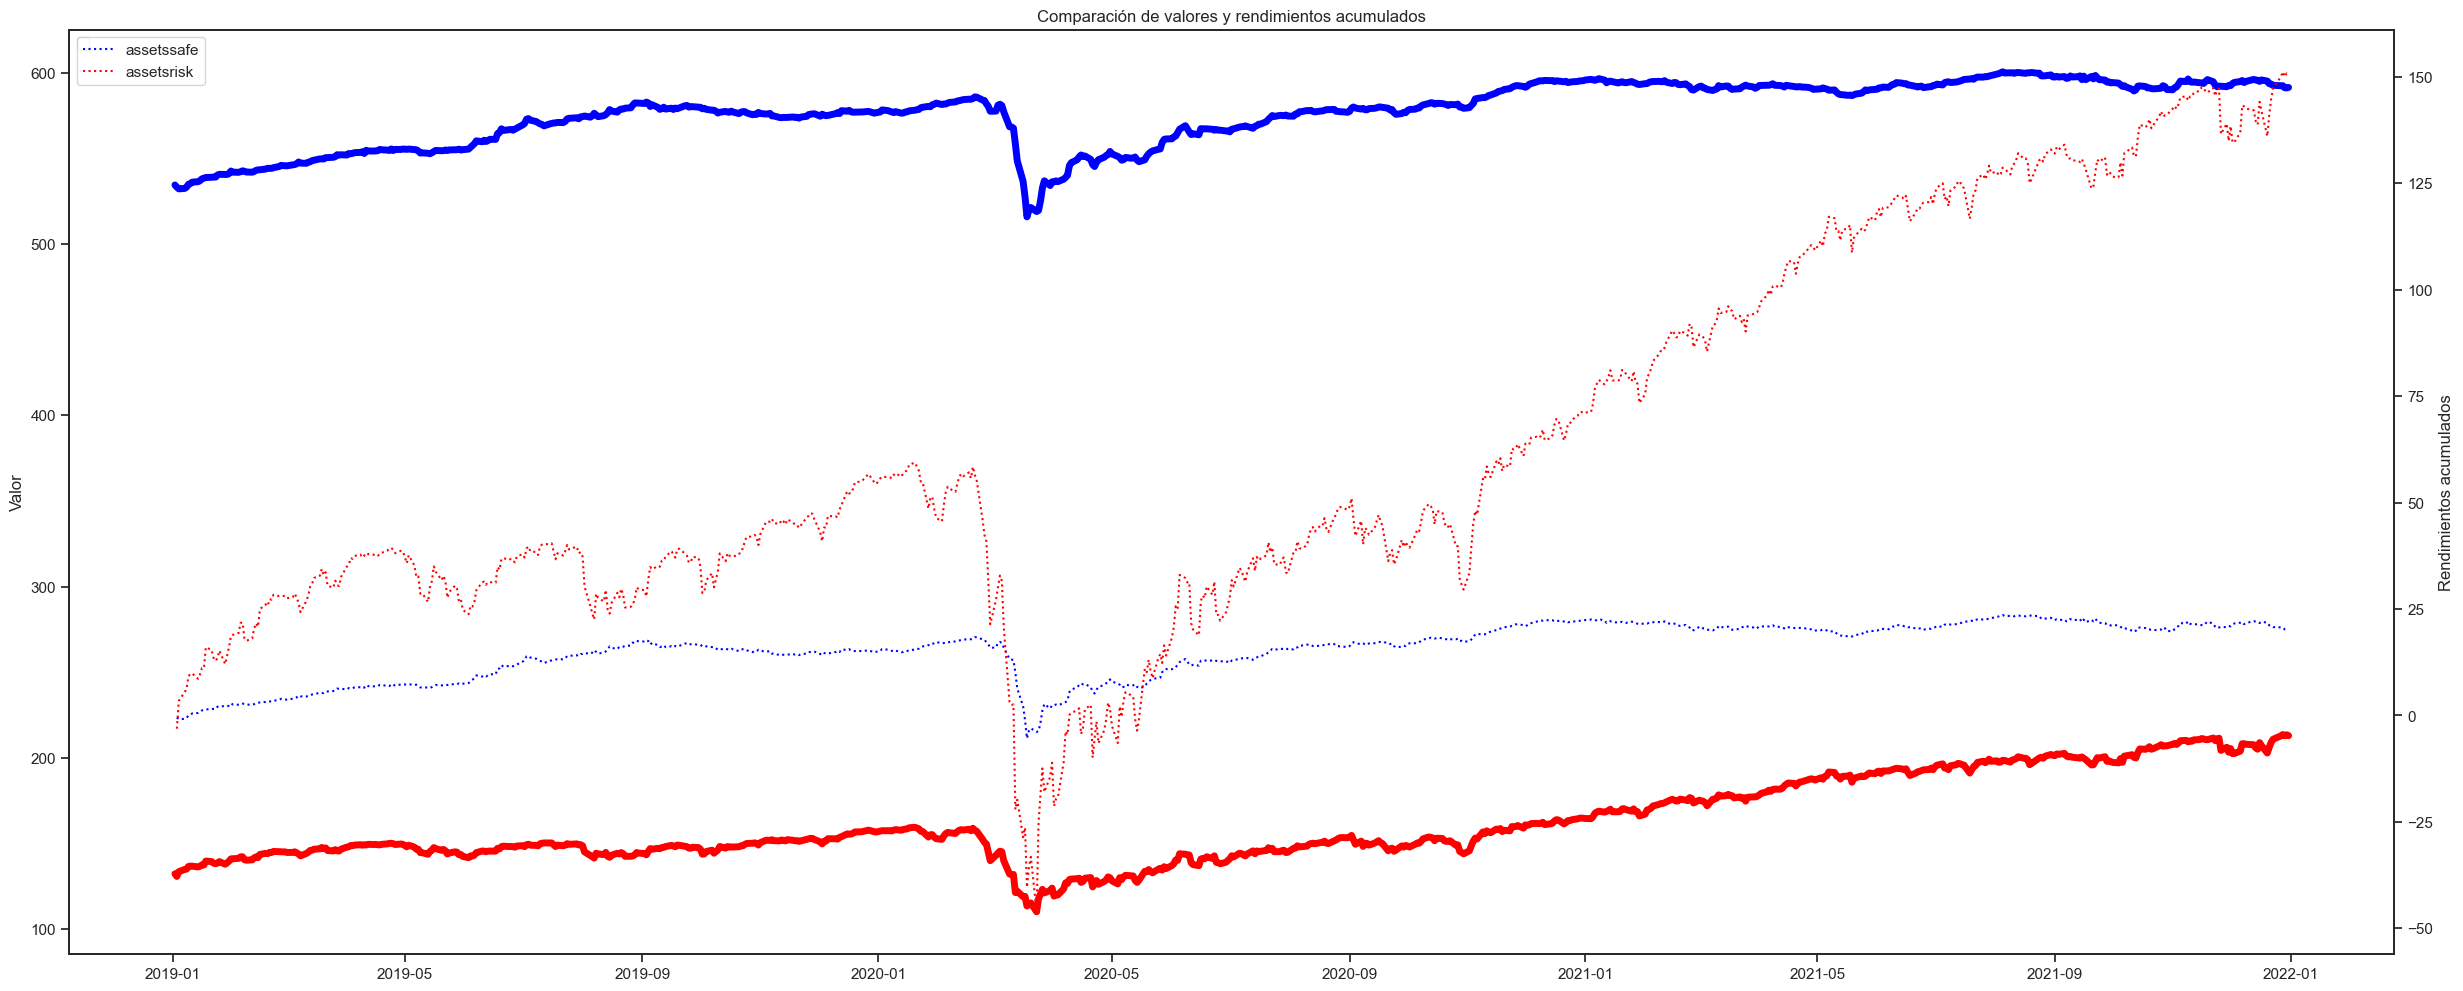

In [61]:
fig, ax = plt.subplots(figsize=(30, 12))
time = dfcartera1["date"]
assetssafe = dfcartera1["assetssafe"]
assetsrisk = dfcartera1["assetsrisk"]

ax.plot(time, assetssafe, color="blue", linewidth=5)
ax.plot(time, assetsrisk, color="red", linewidth=5)

ax2 = ax.twinx()
time = dfcopy["date"]
Asset11 = dfrendimientos_acumulados["assetssafe"]
Asset12 = dfrendimientos_acumulados["assetsrisk"]

ax2.plot(time, Asset11, color="blue", label="assetssafe", ls=":")
ax2.plot(time, Asset12, color="red", label="assetsrisk", ls=":")

ax.legend(loc="upper left")
ax2.legend(loc="upper left")
ax.set_ylabel("Valor")
ax2.set_ylabel("Rendimientos acumulados")
plt.title("Comparación de valores y rendimientos acumulados")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


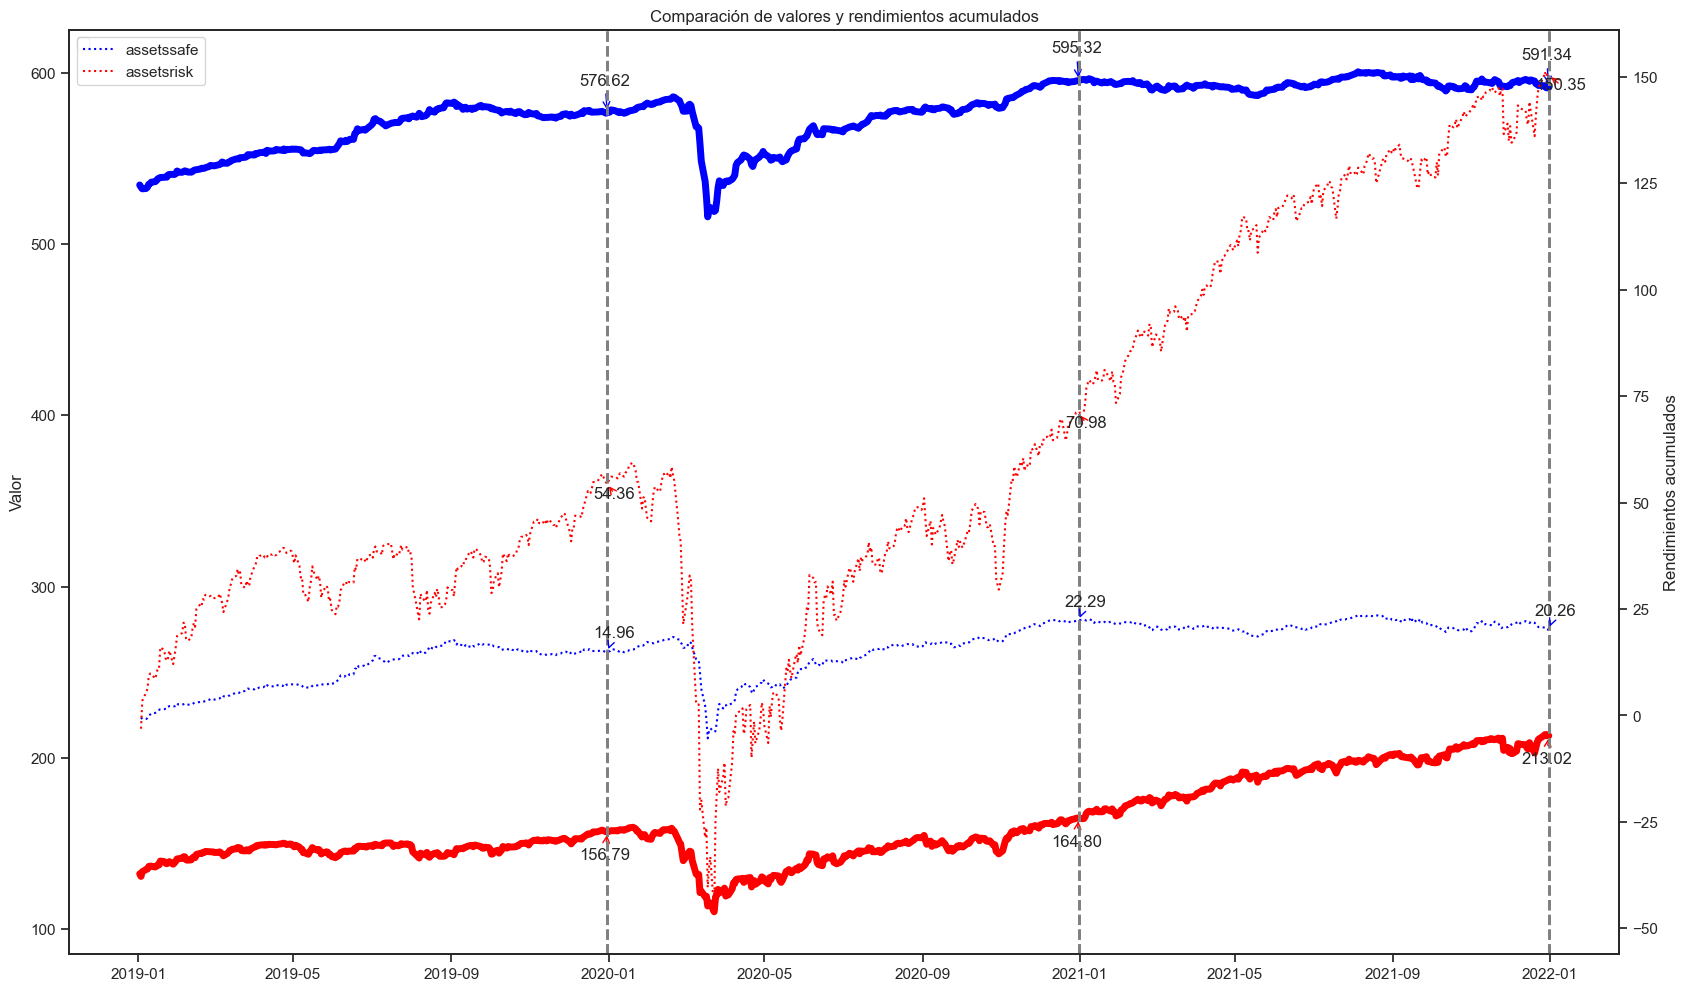

In [62]:
dates = [datetime.strptime(date_str, "%Y-%m-%d") for date_str in ["2019-12-31", "2020-12-31", "2021-12-31"]]

fig, ax = plt.subplots(figsize=(20, 12))

# Primeros datos
time = dfcartera1["date"]
assetssafe = dfcartera1["assetssafe"]
assetsrisk = dfcartera1["assetsrisk"]

# Trazar las líneas principales
ax.plot(time, assetssafe, color="blue", linewidth=5)
ax.plot(time, assetsrisk, color="red", linewidth=5)

# Crear ejes secundarios
ax2 = ax.twinx()

# Segundos datos
time2 = dfcopy["date"]
Asset11 = dfrendimientos_acumulados["assetssafe"]
Asset12 = dfrendimientos_acumulados["assetsrisk"]

# Trazar líneas secundarias
ax2.plot(time2, Asset11, color="blue", label="assetssafe", ls=":")
ax2.plot(time2, Asset12, color="red", label="assetsrisk", ls=":")

# Agregar líneas verticales en las fechas específicas
for date in dates:
    ax.axvline(x=date, color='gray', linestyle='--', linewidth=2)
    ax2.axvline(x=date, color='gray', linestyle='--', linewidth=2)
    
    # Agregar etiquetas de los valores en esos puntos
    valor_safe = dfcartera1[dfcartera1['date'] == date]['assetssafe'].values[0]
    valor_risk = dfcartera1[dfcartera1['date'] == date]['assetsrisk'].values[0]
    rendimiento_safe = dfrendimientos_acumulados[dfrendimientos_acumulados['date'] == date]['assetssafe'].values[0]
    rendimiento_risk = dfrendimientos_acumulados[dfrendimientos_acumulados['date'] == date]['assetsrisk'].values[0]
    
    ax.annotate(f'{valor_safe:.2f}', (date, valor_safe), xytext=(-20, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'), fontsize=12)
    ax.annotate(f'{valor_risk:.2f}', (date, valor_risk), xytext=(-20, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)
    ax2.annotate(f'{rendimiento_safe:.2f}', (date, rendimiento_safe), xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'), fontsize=12)
    ax2.annotate(f'{rendimiento_risk:.2f}', (date, rendimiento_risk), xytext=(-10, -10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)

# Configuraciones adicionales
ax.legend(loc="upper left")
ax2.legend(loc="upper left")
ax.set_ylabel("Valor")
ax2.set_ylabel("Rendimientos acumulados")
plt.title("Comparación de valores y rendimientos acumulados")
plt.show()


In [63]:
dfexperimento1 = df2.copy()
dfexperimento2 = df.copy()
dfexperimento1['date'] = pd.to_datetime(dfexperimento1['date'])
dfexperimento2['date'] = pd.to_datetime(dfexperimento2['date'])
for column in dfexperimento1.columns:
    dfexperimento1[column] = dfexperimento1[column].interpolate(method='linear', limit_direction='forward', axis=0)

In [64]:
dfexperimento1

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [65]:
dfexperimento2

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [66]:
dfexperimento1 = dfexperimento1.drop('date', axis=1)
dfexperimento2 = dfexperimento2.drop('date', axis=1)

In [67]:
df_resultado = dfexperimento1 * dfexperimento2

In [68]:
df_resultado

,Asset1,Asset2,Asset3,Asset4,Asset5
0,52.194894,6.495737,6.797127,69.767682,8.293769
1,52.088816,6.391340,6.758390,69.578828,8.215541
2,51.946101,6.525266,6.929074,69.500523,8.373626
3,51.867574,6.607690,6.878232,69.629496,8.497487
4,51.787964,6.614317,6.926653,69.880533,8.495857
...,...,...,...,...,...
778,17.821117,27.661938,6.551844,NaN,11.102305
779,17.822265,27.813610,6.601633,NaN,11.089637
780,17.735605,27.769439,6.557751,114.884948,11.054798
781,17.723269,27.850065,6.579692,114.915141,11.070634


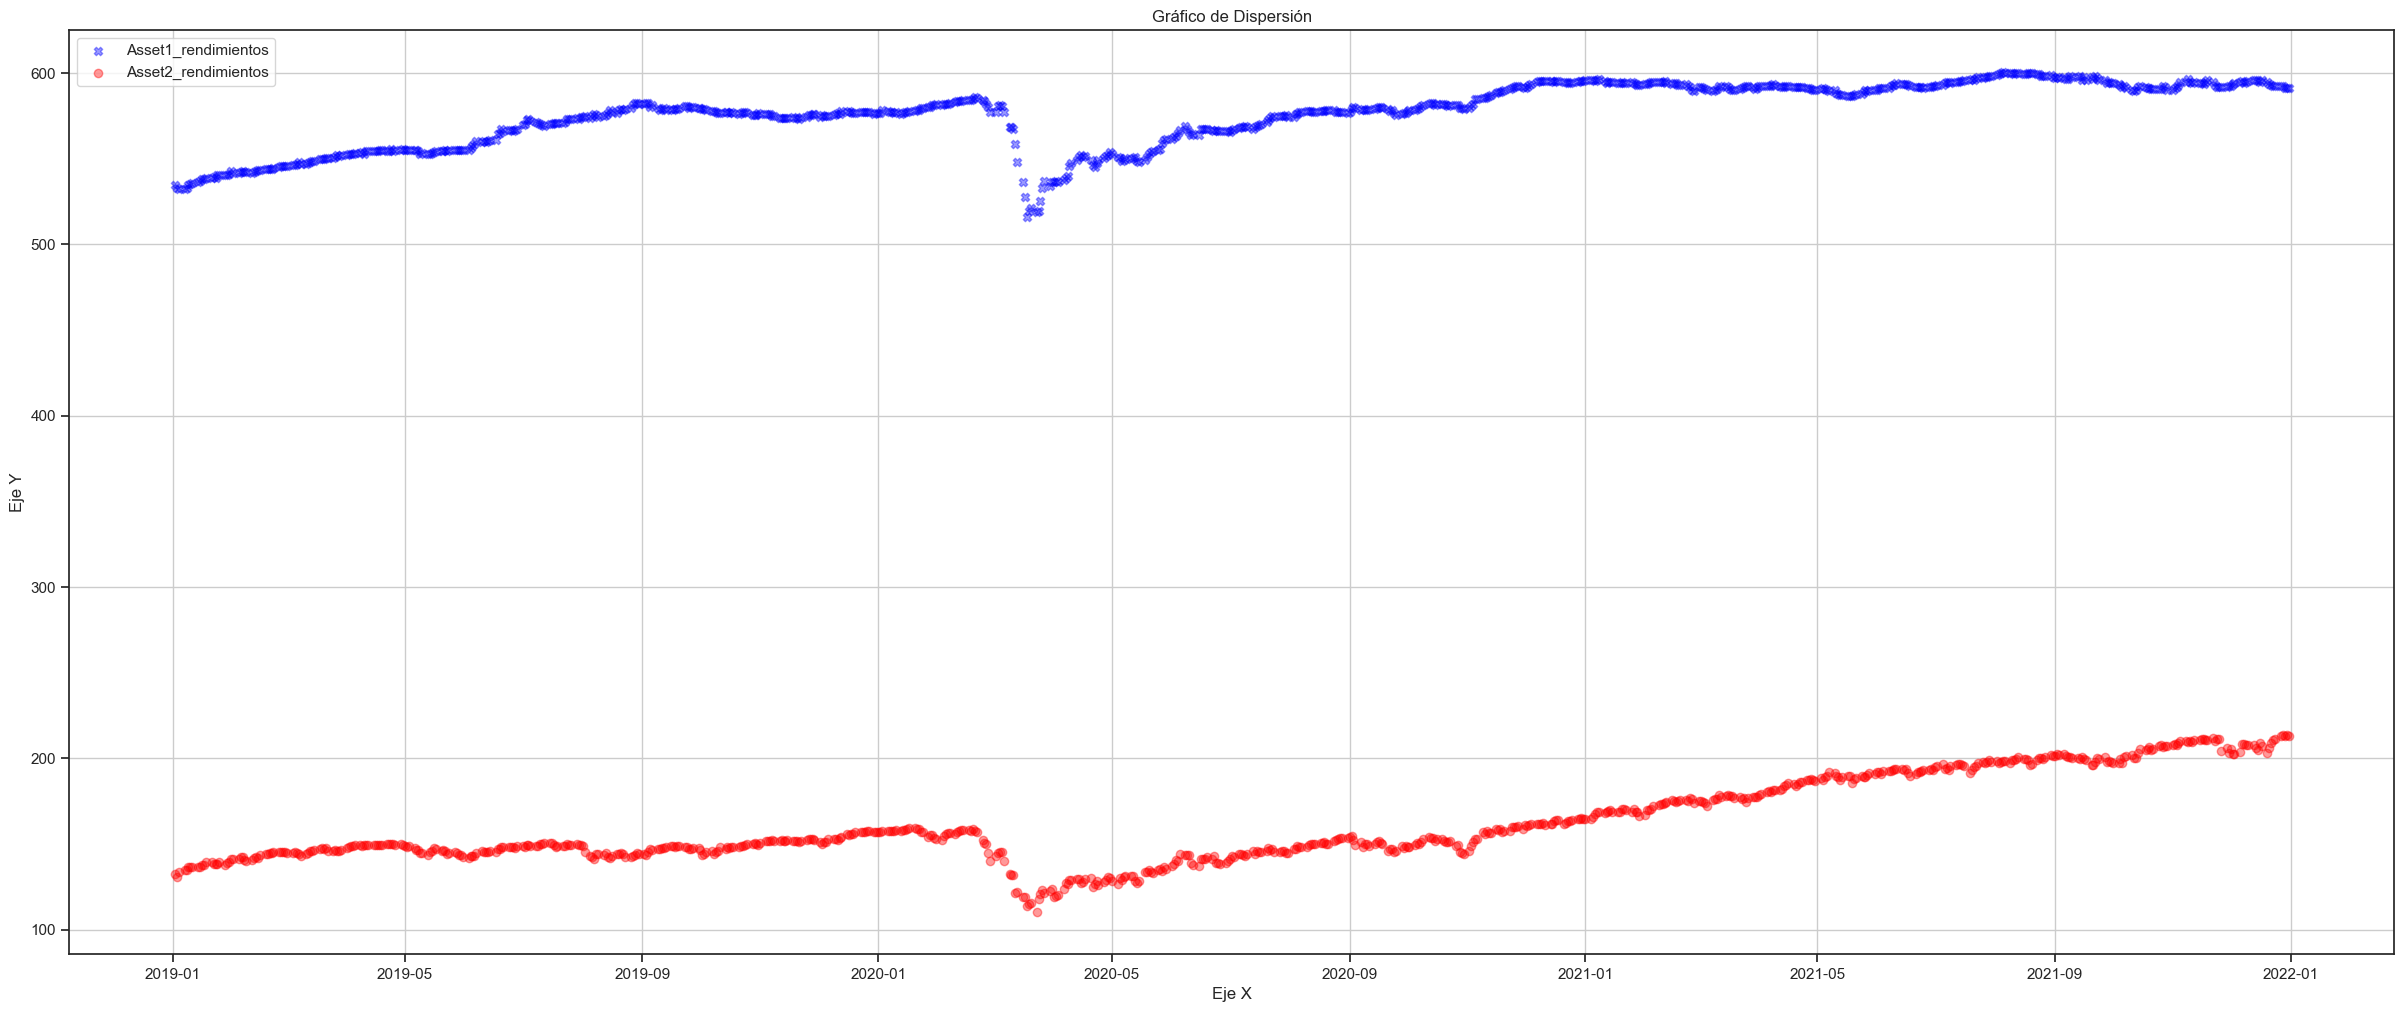

In [70]:
x1 = dfcartera1["date"]
y1 = dfcartera1["assetssafe"]
x2 = dfcartera1["date"]
y2 = dfcartera1["assetsrisk"]

plt.figure(figsize=(30, 12), facecolor="lightgrey", edgecolor="yellow", frameon=False)
plt.scatter(x1, y1, label='Asset1_rendimientos', marker= "X", alpha=0.4, color="blue")
plt.scatter(x2, y2, label='Asset2_rendimientos', marker= "o", alpha=0.4, color="red")

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
y = pd.DataFrame(dfcartera1["assetssafe"].describe())
y

,assetssafe
count,783.000000
mean,576.294077
std,18.177996
min,515.830000
25%,566.818150
50%,578.757100
75%,592.120700
max,600.477500


In [77]:
x = pd.DataFrame(dfcartera1["assetsrisk"].describe())

In [78]:
x

,assetsrisk
count,783.000000
mean,161.601772
std,23.975267
min,110.235372
25%,145.376753
50%,151.694566
75%,179.055546
max,213.671000


In [ ]:
plt.figure(figsize=(20, 12))
for column in dfcumulative_returns.columns:
    plt.fill_between(dfcumulative_returns.index, dfcumulative_returns[column], alpha=0.3, label=column, edgecolor="black")
plt.title('Cumulative Returns of Asset Portfolio', size="20")
plt.xlabel('Days',size="15")
plt.xticks(rotation=45)
plt.xlim(dfcumulative_returns.index[0],None)
plt.ylabel('Cumulative Returns', size="15")
plt.ylim(0.5, None)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()